<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU_11_1%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_housing%20%EA%B0%80%EA%B2%A9%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 알고리즘 개요 ]

. 의사 결정을 위한 규칙을 나무 모양으로 조합하여, 목표 변수(종속 변수)에 대한 예측을 수행하는 기법
 . 이전에 학습한 분류 기능가는 달리 각 항목의 범주를 예측하는 것이 아니라 , 어떠한 값 자체를 예측하는 것이며, 의사 나무 결정 나무를 학습하는 것은 최종적으로 회귀 나무를 구축하는 과정이다.

   Root NOde (Decision NOde) - Sub Node(Tree) - Leaf Tree

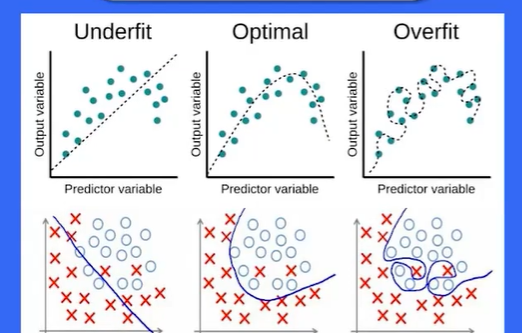

위 그림의  상단 그림을 보면, 회귀 모델인데,
  Underfit은 잘 분류되지 못한 것을 볼 수 있다면, Overfit는 비용이 많이 소요되고, (꼬불꼬불) , 새로운 데이터 값이 필요하면, 어렵게 된다

 위 그림의 하단 그림은 분류 모델인데, 이론은 동일한다.

 Underfit :  하나의 선으로 모든 것을 잘 표현해 줄 수 있느
 Overfit  :

[  접근 방법 ]
  . 종속 벼수는 median_house_value

   . 성능 평가는  MSE (평균 제곱 오차) 값을 모델의 성능을 평가.

     (잔차 == 오차 )

1. 필요 pkg import

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor




 2. 데이터 불러오기

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

3. 데이터 탐색

In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [26]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

4. 데이터 전처리

In [30]:
df = df.dropna(axis=0)

/// 다음과 같이 상관 관계 분석을 하자.
이번 예제 에서는 pearson 상관 분석을 적용.

Pearson 상관계수 (선형 관계 측정)

Spearman 상관계수 (비선형 관계 측정)

##단, 높은 상관 관계가 반드시 인과관계를 의미 하지는 않는다.

In [34]:
## 변수들 간의 상관 관계 분석
corr = df.corr(method = "pearson")
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


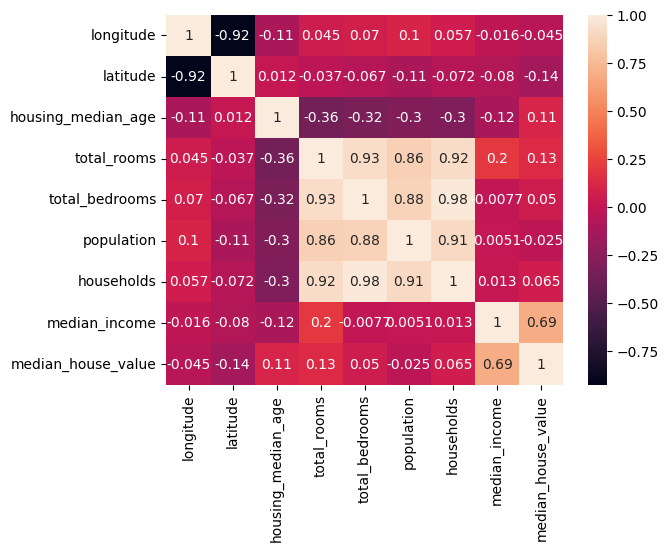

In [36]:
ax = sns.heatmap(corr, annot = True)

5. 분석 data set 준비

// 분할 기준 : MSE를 최소화 하는 방향으로 데이터를 분할한다.
// 이것은 Decision Tree Regression 이므로  "최종 노드(leaf)에 도달했을 때, 해당 구간 내 타겟 값의 **평균을 **예측값으로 사용"


In [37]:
##median house value를 제외한 X 변수와   y 변수를 구분한다.

X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

## 분석 데이터 셋 분할 (7:3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14303, 8)
(6130, 8)
(14303,)
(6130,)


6. 분석 및 예측

In [40]:
## 객체 생성

dtr = DecisionTreeRegressor( max_depth = 3, random_state = 42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [45]:
## 학습이 완료된 dtr 객체에서 테스트 데이텅셋으로 예측

pred = dtr.predict(X_test)

pred

array([161047.82833787, 204355.50523292, 204355.50523292, ...,
       204355.50523292, 118587.94035322, 118587.94035322])

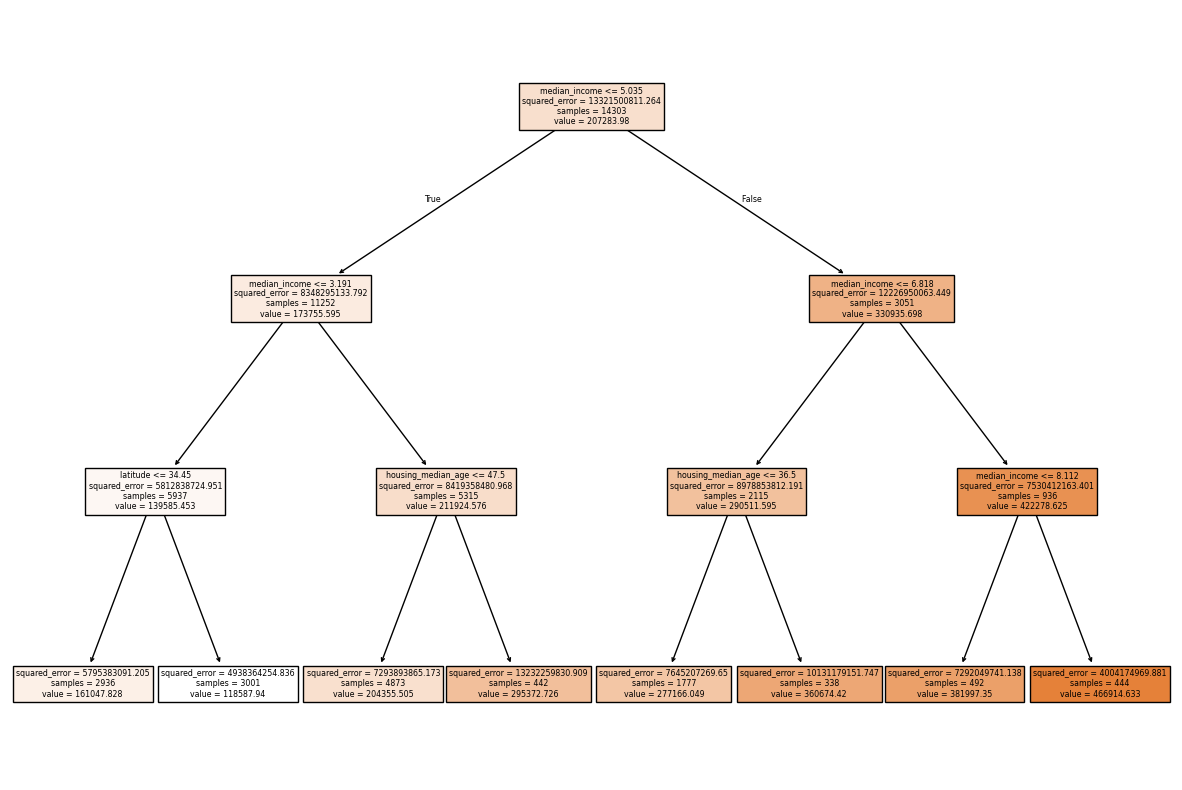

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtr, feature_names=X.columns, filled=True)
plt.show()

7. 성능 평가

In [46]:
### MSE를 사용하자.

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error ( y_test, pred)   ## data set의 객수가 같아야 한다.

print(mse)

6793101269.876856


In [49]:
## 학습이 완료된 dtr객체에서 학습 데이터셋으로 예측 수행

pred_train = dtr.predict(X_train)

mse =mean_squared_error(y_train, pred_train)

print(mse)
print(pred_train)

6684086804.552605
[118587.94035322 161047.82833787 277166.04895892 ... 161047.82833787
 277166.04895892 295372.72624434]


[ 도전과제]  의사 결정 나무 알고리즘의 파라미터를 변경하고 성능을 계산해 보자.

  n_estimators : 클수록 좋은 것.
  max_features
  max_depth  : 클수록 과적합 발생 가능성 높다.
  max_leaf_nodes
  min_smaplies_leaf
  

//
회귀 모델에서 MSE(Mean Squared Error)는 예측값과 실제값의 평균 제곱 오차를 측정하는 지표입니다. 보스톤 주택 가격 예측에서 MSE 값이 주는 주요 인사이트는 다음과 같습니다:

1. 오차 규모의 정량화
MSE 계산식:

MSE
=
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
MSE=
n
1
  
i=1
∑
n
 (y
i
 −
y
^
  
i
 )
2

y
i
y
i
 : 실제 주택 가격,
y
^
i
y
^
  
i
 : 예측 가격

해석:

값이 클수록 예측 오차가 크다는 의미 (예: MSE=25,000,000 → RMSE=5,000 → 평균 오차 ±5,000$).

단위 문제: 주택 가격 단위가 $10,000인 경우, MSE=25 → 실제 오차는 약 $5,000(
25
25
 )입니다.

2. 과적합 vs. 일반화 성능 평가
훈련 데이터 MSE vs. 테스트 데이터 MSE:

경우	의미
훈련 MSE ≪ 테스트 MSE	모델이 훈련 데이터에 과적합되어 새로운 데이터 예측 능력 저하.
훈련 MSE ≈ 테스트 MSE	모델이 일반화 성능을 잘 유지하고 있음.
둘 다 높음	모델이 데이터 패턴을 충분히 학습하지 못한 과소적합 상태.
3. 특이치(Outlier) 영향 감지
MSE 특성: 큰 오차에 제곱 패널티를 부여하므로 특이치에 민감합니다.

예: 100만 $ 오차가 1건 발생 → MSE에 1조(
10
12
10
12
 ) 기여.

대응 전략: 이상치 제거 또는 Robust 회귀 모델(Huber Loss) 사용.

4. 모델 비교 및 개선 방향
모델 간 비교: 동일 데이터셋에서 MSE가 낮은 모델이 우수하지만, 과적합 여부 확인 필수.

성능 개선:

특성 공학: 상관관계 높은 변수 추가/제거.

트리 깊이 조정: max_depth 파라미터 튜닝.

앙상블: Random Forest나 Gradient Boosting 적용.

5. MSE의 한계와 보완 지표
한계:

단위가 실제 오차와 일치하지 않음 → RMSE로 변환 필요.

방향성 무시 → MAE와 병행 사용 권장.

보조 지표:

R²: 데이터 분산 설명 비율(1에 가까울수록 우수).

MAE: 평균 절대 오차(해석 용이).

1. MSE란 무엇인가요?
**MSE(Mean Squared Error)**는 예측값과 실제값의 오차를 제곱해서 평균을 낸 것입니다.

MSE
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2

𝑦
𝑖
y
i
​
 : 실제 값

𝑦
^
𝑖
y
^
​
  
i
​
 : 예측 값

𝑛
n: 샘플 수

오차를 제곱하므로, 음/양 구분 없이 오차 크기를 평가하며, 큰 오차에 더 큰 패널티를 주게 됩니다.

📌 2. MSE 값이 주는 인사이트는?
✅ 단순한 수치 그 이상으로 다음의 의미를 가집니다:
MSE 값의 크기	의미	인사이트
낮다 (예: 0.5, 1.2 등)	예측값이 실제값과 거의 비슷하다	모델이 잘 학습되었고, 일반화가 잘 되었을 가능성이 있다
높다 (예: 50, 120 등)	예측값이 실제값과 차이가 크다	모델이 학습을 덜 했거나, 과적합/과소적합일 수 있다
Train MSE ≪ Test MSE	과적합 (overfitting)	훈련 데이터에 너무 민감하게 학습, 일반화 실패
Train MSE ≈ Test MSE 둘 다 큼	과소적합 (underfitting)	모델이 데이터 패턴을 제대로 학습 못함 (단순 모델일 수도 있음)
👀 예시로 직관적으로 이해해 볼까요?
예를 들어 집값 단위가 $100,000이라면:

MSE = 25
→ 평균적으로 오차 제곱이 25 → 오차의 평균 루트는 약 5 단위 = $500,000
→ 예측값이 실제값에서 약 50만 원 정도 차이 나는 셈입니다.

💬 그럼, 이걸로 무엇을 해야 할까요?
비교 지표로 사용

다양한 모델, 하이퍼파라미터 실험 후, MSE가 가장 낮은 모델 선택

다른 성능 지표(RMSE, MAE 등)와 함께 해석하면 더 좋음

모델 성능 개선 방향성 탐색

너무 크면: 모델 구조를 바꾸거나, 더 많은 데이터/특성 추가

Train/Test 간 차이가 크면: regularization 적용, pruning 등 고려

RMSE (√MSE)로 변환

MSE가 제곱 오차라 직관적이지 않을 수 있으므로, RMSE로 바꾸면 단위도 실제 target과 같아져 직관적입니다.

✨ 결론 요약:
MSE는 예측값이 실제값과 얼마나 차이 나는지를 수치로 나타내는 지표

낮을수록 모델의 성능이 좋은 것

Train/Test의 MSE 차이로 과적합/과소적합 판단 가능

해석할 때는 데이터의 단위와 **다른 지표(RMSE, MAE 등)**도 함께 고려하면 더 풍부한 인사이트를 얻을 수 있어요.

